# Application Packages in the xcube ecosystem
### EO Summer School 2025

Welcome to the Summer School 2025 course on xcube and Application Packages! This notebook will guide you through the hands-on exercises in the course.

## 0. Requirements

Before you start, check the requirements list below (also given at <https://xcube-dev.github.io/summerschool25/>) and make sure that you have the necessary software installed. Open a terminal emulator (either within this JupyterLab or on your desktop) and navigate to the directory containing this notebook.

To follow along with the course content, you'll need to have the following
installed and working on your computer:

- Your preferred **terminal emulator**, preferably running the bash shell.
- A **conda-based Python environment**, which we'll use to set up an
  environment in which to run the Python tools. I recommend
  [mamba](https://mamba.readthedocs.io/). You can find [installation
  instructions
  here](https://mamba.readthedocs.io/en/latest/installation/mamba-installation.html).
- [git](https://git-scm.com/)
- [docker](https://www.docker.com/)

If there's enough time at the end, we'll also set up an Application Package
Platform using [ZOO](https://zoo-project.org/) and use it to run an
Application Package locally! If you also want to follow along with this on
your own machine, you should have the following installed:

- [minikube](https://minikube.sigs.k8s.io/docs/start/)
- [helm](https://helm.sh/)
- [kubectl](https://kubernetes.io/docs/tasks/tools/#kubectl)

## The course GitHub repository

All the course materials, including this notebook, are in a GitHub repository at <https://github.com/xcube-dev/summerschool25/>. To follow the course, you should be reading this notebook from a local clone of the GitHub repository, running in a Jupyter Lab environment on your own computer. If this isn't the case, first follow the
instructions in the `README.md` file to get set up.

## 1. Writing a simple application package

### Introducing the CWL file

In this part, we will look at, run, and modify a CWL file which defines a very simple Application Package. It takes no input parameters, and produces as output a single text file containing the text "Hello world!".

Open the file [helloworld.cwl](hello-ap/helloworld.cwl) in this Jupyter Lab or in your favourite text editor. Make sure that you understand the parts: the `Workflow` and `CommandLineTool` sections, the files written into the container, and the command that gets executed in the container.

### Running CWL with `cwltool`

Now let's run it in the terminal. Make sure you have activated the `summerschool25` environment that you created earlier (`conda activate summerschool25`), and that your current directory is the repository directory containing this notebook.

In this command, we use:

- `--outdir` to select the directory where the output data will be written
- `-w` to select a file where cwltool's list of output files will be written. We don't need this list, but you can open the file and take a look if you're curious.
- `hello-ap/helloworld.cwl#hello` to specify the workflow to run. `hello-ap/helloworld.cwl` gives the path to the file and `#hello` gives the identifier of the workflow within the file.

> ℹ️ Shell commands are integrated into this notebook and can be run here directly. If you prefer, you can also copy the command and run it in an external terminal (without the preceding `!`).

In [1]:
!cwltool --outdir=hello -w hello.json hello-ap/helloworld.cwl#hello

INFO /home/pont/miniforge3/envs/summerschool25/bin/cwltool 3.1.20251031082601
INFO Resolved 'hello-ap/helloworld.cwl#hello' to 'file:///home/pont/loc/repos/summerschool25/hello-ap/helloworld.cwl#hello'
INFO [workflow ] start
INFO [workflow ] starting step run_script
INFO [step run_script] start
INFO [job run_script] /tmp/svs01122$ docker \
    run \
    -i \
    --mount=type=bind,source=/tmp/svs01122,target=/cfdswx \
    --mount=type=bind,source=/tmp/wz648ww0,target=/tmp \
    --workdir=/cfdswx \
    --read-only=true \
    --net=none \
    --user=1000:1000 \
    --rm \
    --cidfile=/tmp/61t3k3yt/20251113144646-339528.cid \
    --env=TMPDIR=/tmp \
    --env=HOME=/cfdswx \
    alpine:3.22.1 \
    sh \
    myscript.sh
INFO [job run_script] completed success
INFO [step run_script] completed success
INFO [workflow ] completed success
INFO Final process status is success


The outputs will appear in a subdirectory of the `hello1` directory that you specified as `--outdir`. Inside this directory you'll find:

* `myscript.sh`, the one-line program that produced the output.
* `hello.txt`, the output produced by the script.
* `item.json`, a STAC item describing the output file.
* `catalog.json`, a STAC catalogue listing the STAC item.

`cwltool` doesn't care about the STAC data, but a real Application Package platform will use the STAC catalogue to find the output file and stage it out to the user or system that ran the Application Package.

### Try some modifications and additions to the CWL

You can try changing things in the CWL file (e.g. make the shell script write something else) to see the effects when running it. If you want to try a more interesting exercise, add an input parameter – for example, a name that can be inserted in the output text. Make a copy of `hello-ap/helloworld.cwl` under the name `hello-ap/helloworld2.cwl` to try out these changes. The parameter has to be defined in four places:

1: In the workflow, replace `inputs: {}` with
```yaml
    inputs:
      name:
        type: string
        default: world
```

2: In the `run_script` subsection of the workflow, replace `in: {}` with
```yaml
        in:
          name: name
```
This maps the workflow parameter `name` to the `CommandLineTool` parameter which is *also* called `name`.

3: In `CommandLineTool`, replace `inputs: {}` with
```yaml
    inputs:
      name:
        type: string
        inputBinding:
          position: 1
```
This tells the `CommandLineTool` to provide the `name` parameter as the first positional argument to the script.

4: In the inline listing for `myscript.sh`, replace `"Hello world!"` with `"Hello $1!"`. This will insert the first positional argument to the script after `Hello`.

Now try running the modified file, supplying a value for the `name` parameter.

In [2]:
!cwltool --outdir=hello2 -w hello2.json hello-ap/helloworld2.cwl#hello --name Jeff

INFO /home/pont/miniforge3/envs/summerschool25/bin/cwltool 3.1.20251031082601
INFO Resolved 'hello-ap/helloworld2.cwl#hello' to 'file:///home/pont/loc/repos/summerschool25/hello-ap/helloworld2.cwl#hello'
INFO [workflow ] start
INFO [workflow ] starting step run_script
INFO [step run_script] start
INFO [job run_script] /tmp/aww980ft$ docker \
    run \
    -i \
    --mount=type=bind,source=/tmp/aww980ft,target=/tjbEKB \
    --mount=type=bind,source=/tmp/x963uhi9,target=/tmp \
    --workdir=/tjbEKB \
    --read-only=true \
    --net=none \
    --user=1000:1000 \
    --rm \
    --cidfile=/tmp/844s2hng/20251113144648-105576.cid \
    --env=TMPDIR=/tmp \
    --env=HOME=/tjbEKB \
    alpine:3.22.1 \
    sh \
    myscript.sh \
    Jeff
INFO [job run_script] completed success
INFO [step run_script] completed success
INFO [workflow ] completed success
INFO Final process status is success


Check the output in the `hello2` directory to see that the name was correctly inserted.

## 2. Turning a Jupyter notebook into an Application Package with `xcetool`

### Introducing the input notebook

In the subdirectory `xcengine-nb` of this repository, you will find:
- A notebook called [dynamic.ipynb](xcengine-nb/dynamic.ipynb) which generates some artificial EO data and displays it in the notebook.
- An `environment.yml` file defining the Python environment for the notebook.

First, open the notebook here in Jupyter Lab, look through it, and try running it. The `summerschool25` Python environment already contains all the packages it needs, so you don't need to worry about setting up a special environment for the notebook.

### Turn the notebook into an Application Package

Next, we'll convert the notebook into an Application Package using the `xcetool` command-line utility from the `xcengine` package.

> ℹ️ Normally, you'd push the Docker image for an Application Package to a public registry like Docker Hub, so that it's available for a platform to run. To keep things simple and avoid a potentially slow upload process, we'll keep the image local in this course.

Most of the xcetool configuration is in the notebook itself, so the command is rather simple. Make sure you're in the repository root directory, then:

In [3]:
!xcetool image build --eoap dynamic.cwl xcengine-nb/dynamic.ipynb

INFO:xcengine.core:No tag specified; looking for one in the notebook.
INFO:xcengine.core:Using tag dynamic:1 from notebook.
INFO:xcengine.core:No environment file specified; looking for one in the notebook.
INFO:xcengine.core:Using environment file environment.yml as specified in notebook.
INFO:xcengine.core:Building image with tag dynamic:1...
INFO:xcengine.core:Docker image built.
Built image with tags ['dynamic:1']


This might take a little while, but after a couple of minutes you should see a confirmation like

```text
INFO:xcengine.core:Docker image built.
Built image with tags ['dynamic:1']
```

### Run the application package

Just as with the hand-build CWL, we can run this Application Package with `cwltool`. Note the `--periods 20` parameter at the end: this is an argument not to cwltool, but to the CWL file that it's running: we're providing a value for the `periods` parameter of the Application Package (taken from the parameters cell of the notebook), overriding the default vaue of 10.



In [4]:
!cwltool --outdir=dynamic1 --w dynamic.json dynamic.cwl#dynamic --periods 20

INFO /home/pont/miniforge3/envs/summerschool25/bin/cwltool 3.1.20251031082601
INFO Resolved 'dynamic.cwl#dynamic' to 'file:///home/pont/loc/repos/summerschool25/dynamic.cwl#dynamic'
INFO [workflow ] start
INFO [workflow ] starting step run_script
INFO [step run_script] start
INFO [job run_script] /tmp/3xup_t47$ docker \
    run \
    -i \
    --mount=type=bind,source=/tmp/3xup_t47,target=/IomhZL \
    --mount=type=bind,source=/tmp/8ar69aos,target=/tmp \
    --workdir=/IomhZL \
    --read-only=true \
    --user=1000:1000 \
    --rm \
    --cidfile=/tmp/1ptqo_m_/20251113144651-966860.cid \
    --env=TMPDIR=/tmp \
    --env=HOME=/IomhZL \
    dynamic:1 \
    /usr/local/bin/_entrypoint.sh \
    python \
    /home/mambauser/execute.py \
    --batch \
    --eoap \
    --periods \
    20
INFO:matplotlib.font_manager:generated new fontManager
CWD /IomhZL
INFO [job run_script] Max memory used: 114MiB
INFO [job run_script] completed success
INFO [step run_script] completed success
INFO [workflow

### Examine the results

First, let's import a couple of libraries that we'll need.

In [5]:
import glob
from pathlib import Path
import pystac
import xarray as xr
import glob

We'll pretend that we're an Application Package platform performing data stage-out, and use the STAC catalogue to find an asset to plot. `cwltool` writes the output to a subdirectory with a random name, so we use a filename glob to find its location.

In [6]:
catalogue_path = glob.glob("dynamic1/*/catalog.json")[0]
catalogue_path

'dynamic1/26l7gk4u/catalog.json'

Now we use `pystac` to parse the catalogue and find links to the items it contains.

In [7]:
catalogue = pystac.Catalog.from_file(catalogue_path)
item_links = catalogue.get_item_links()
item_links

[<Link rel=item target=./cube1/cube1.json>,
 <Link rel=item target=./cube2/cube2.json>]

Let's try to find a zarr asset in the first item. First we need to resolve the path to the item relative to the path of the root catalogue.

In [8]:
item_rel_path = item_links[0].target
item_path = Path(catalogue_path).parent / item_rel_path
item_path

PosixPath('dynamic1/26l7gk4u/cube1/cube1.json')

Now we can create a STAC item from the file and take a look at it.

In [9]:
item = pystac.Item.from_file(item_path)
item

<Item id=cube1>

Let's get the asset with the `zarr` identifier. Again we have to resolve the path – this time relative to the STAC item.

In [10]:
asset_path = Path(item_path).parent / item.assets["zarr"].href

Finally we open the asset (a Zarr archive) with `xarray`, look at its properties, and plot it.

In [11]:
cube = xr.open_dataset(asset_path)
cube

<xarray.Dataset> Size: 10MB
Dimensions:    (time: 20, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 160B 2010-01-01T12:00:00 ... 2010-01-20T...
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    time_bnds  (time, bnds) datetime64[ns] 320B ...
Dimensions without coordinates: bnds
Data variables:
    v          (time, lat, lon) float64 10MB ...
Attributes:
    Conventions:           CF-1.7
    geospatial_lat_max:    90.0
    geospatial_lat_min:    -90.0
    geospatial_lat_units:  degrees_north
    geospatial_lon_max:    180.0
    geospatial_lon_min:    -180.0
    geospatial_lon_units:  degrees_east
    time_coverage_end:     2010-01-21T00:00:00.000000000
    time_coverage_start:   2010-01-01T00:00:00.000000000
    title:                 Cube 1

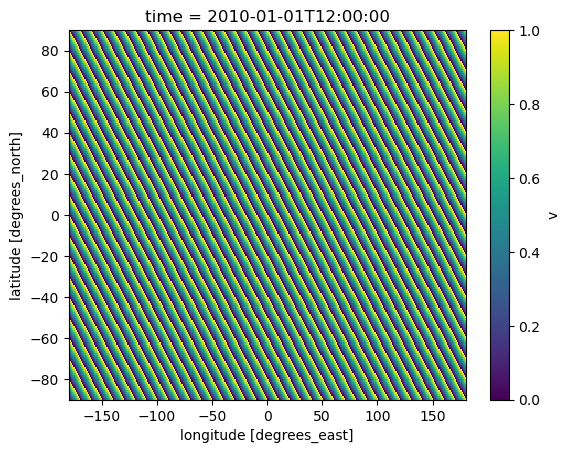

In [12]:
cube.v.isel(time=0).plot.imshow()

### Adding another parameter

Now let's add a new input parameter to the "dynamic" notebook and rebuild the Application Package! Fortunately this is a little less fiddly that adding a parameter manually in CWL, as we did above.

Make a new copy of the notebook named `dynamic2.ipynb`, and make the following changes:

1. In the parameters cell, add the variable assignment `varname = "foobar"`. Now we have a new string parameter.
2. In the parameters cell, change the value of `container_image_tag` to `dynamic:2`, so we don't overwrite the tag of our first image.
3. In the definition of `cube1`, change `variables={"v"` to `variables={varname`. We're using our new parameter to set the name of `cube1`'s data variable.

Now let's build a new version of the Docker image and application package using the updated notebook.

In [13]:
!xcetool image build --eoap dynamic2.cwl xcengine-nb/dynamic2.ipynb

INFO:xcengine.core:No tag specified; looking for one in the notebook.
INFO:xcengine.core:Using tag dynamic:2 from notebook.
INFO:xcengine.core:No environment file specified; looking for one in the notebook.
INFO:xcengine.core:Using environment file environment.yml as specified in notebook.
INFO:xcengine.core:Building image with tag dynamic:2...
INFO:xcengine.core:Docker image built.
Built image with tags ['dynamic:2']


Once again, we use `cwltool` to run the newly created application package. This time we can also add a `--varname` command-line parameter to override the default value of our newly added parameter.

In [14]:
!cwltool --outdir=dynamic2 -w dynamic2.json dynamic2.cwl#dynamic --periods 12 --varname jeff

INFO /home/pont/miniforge3/envs/summerschool25/bin/cwltool 3.1.20251031082601
INFO Resolved 'dynamic2.cwl#dynamic' to 'file:///home/pont/loc/repos/summerschool25/dynamic2.cwl#dynamic'
INFO [workflow ] start
INFO [workflow ] starting step run_script
INFO [step run_script] start
INFO [job run_script] /tmp/26j9oo_q$ docker \
    run \
    -i \
    --mount=type=bind,source=/tmp/26j9oo_q,target=/tjcBpG \
    --mount=type=bind,source=/tmp/z9kno0xg,target=/tmp \
    --workdir=/tjcBpG \
    --read-only=true \
    --user=1000:1000 \
    --rm \
    --cidfile=/tmp/aso7qlab/20251113144659-007336.cid \
    --env=TMPDIR=/tmp \
    --env=HOME=/tjcBpG \
    dynamic:2 \
    /usr/local/bin/_entrypoint.sh \
    python \
    /home/mambauser/execute.py \
    --batch \
    --eoap \
    --periods \
    12 \
    --varname \
    jeff
INFO:matplotlib.font_manager:generated new fontManager
CWD /tjcBpG
INFO [job run_script] Max memory used: 108MiB
INFO [job run_script] completed success
INFO [step run_script] com

As before, we use the `pystac` library to navigate the STAC catalog and find the asset.

In [15]:
catalogue_path = glob.glob("dynamic2/*/catalog.json")[0]
catalogue = pystac.Catalog.from_file(catalogue_path)
item_path = Path(catalogue_path).parent / catalogue.get_item_links()[0].target
item = pystac.Item.from_file(item_path)
asset_path = Path(item_path).parent / item.assets["zarr"].href
ds2 = xr.open_zarr(asset_path)

Now let's take a look at the resulting dataset.

In [16]:
ds2

<xarray.Dataset> Size: 6MB
Dimensions:    (time: 12, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 96B 2010-01-01T12:00:00 ... 2010-01-12T1...
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    jeff       (time, lat, lon) float64 6MB dask.array<chunksize=(3, 90, 180), meta=np.ndarray>
Attributes:
    Conventions:           CF-1.7
    geospatial_lat_max:    90.0
    geospatial_lat_min:    -90.0
    geospatial_lat_units:  degrees_north
    geospatial_lon_max:    180.0
    geospatial_lon_min:    -180.0
    geospatial_lon_units:  degrees_east
    time_coverage_end:     2010-01-13T00:00:00.000000000
    time_coverage_start:   2010-01-01T00:00:00.000000000
    title:                 Cube 1

From the `time` dimension, we can see that the `periods` parameter was correctly set, and under "Data variables" we can see that the variable name was also successfully set.

## 3. Running an xcengine image as an xcube server/viewer

The Docker images produced by xcengine aren't only useful in Application Packages: by running them with the `--server` option, you can start an xcube server instance serving the data from your notebook. The server also includes a web viewer component.

You can start the server/viewer directly with `docker run`, but for convenience, `xcetool` also has the `xcetool image run` command. You can use it as follows:

In [ ]:
!xcetool image run --server dynamic:1 --port 9090

INFO:xcengine.core:Running container from image sha256:e3d0aa243ffd
INFO:xcengine.core:Image tags: dynamic:1
INFO:xcengine.core:Waiting for container a5761d1943c9 to complete.


By default, the server will run on port 8080; we can override this with the `--port` option shown above, and xcengine will set up the server/viewer configuration and Docker port forwarding appropriately.

- The xcube API server will now be available at <http://localhost:9090/>.
- You can find a human-friendly overview of xcube server's APIs on the OpenAPI page at <http://localhost:9090/openapi.html>.
- The xcube Viewer (which uses the API server as a backend) will be available at <http://localhost:9090/viewer>.

> ℹ️ The example dataset is of global extent and covers the basemap completely. If you click on the colour bar in the legend at the top right, you can lower the opacity of the data display and reveal the basemap behind the data.

After adjustment of the opacity, your viewer should look something like this:

![viewer](resources/viewer.png)

# 4. Setting up ZOO as an Application Package platform
(Optional extra!)

After installing minikube, helm, and kubectl, you can install ZOO with the necessary extensions from a terminal:

```bash
minikube start

helm upgrade -i zoo-project-dru \
  zoo-project/zoo-project-dru \
  --namespace zoo --create-namespace \
  --values https://raw.githubusercontent.com/ZOO-Project/charts/refs/heads/main/zoo-project-dru/values_minikube.yaml
```

Helm will then print some information, including a list of commands that you should run in your shell to set up port forwarding.